In [78]:
# Age and Performance:
# How does player performance overall rating change with age?
# Is there an age range where players tend to peak in performance?

# Overall Performance:
# What is the distribution of overall ratings among the players?
# Are there any specific attributes strongly correlated with overall ratings?

# Physical Attributes:
# How are height and weight distributed among the players?
# Is there a correlation between physical attributes (e.g., height, weight) and certain performance metrics?

# Potential Analysis:
# How does the distribution of potential ratings look?
# Are there attributes that correlate strongly with a player's potential?

# Levels:
# What are the average scores for key skills like crossing, finishing, dribbling, etc.?
# Can you identify players with exceptional skills in specific areas?

# Positional Analysis:
# What are the typical attributes for players in different positions?
# Can you identify any standout players based on their attributes relative to their positions?

In [127]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [80]:
# Connect to the SQLite database
with sqlite3.connect('database.sqlite') as con:
    # Write the SQL query to join the 'player' and 'player_attributes' tables
    query = """
    SELECT 
        player.*,
        player_attributes.*
    FROM player
    INNER JOIN player_attributes ON player.player_api_id = player_attributes.player_api_id
    """

    # Execute the query and load the result into a Pandas DataFrame
    players = pd.read_sql_query(query, con)

# Display the first few rows of the merged DataFrame for inspection
players.head()


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [81]:
# Drop duplicate columns
players = players.loc[:, ~players.columns.duplicated()]

# Drop unnecessary columns
columns_to_drop = ['id', 'player_api_id', 'player_fifa_api_id']
players = players.drop(columns_to_drop, axis=1, errors='ignore') 

# Remove duplicate rows based on the 'player_name' column
players = players.drop_duplicates(subset=['player_name'])

# Rename the 'player_name' column to 'name'
players = players.rename(columns={'player_name': 'name'})

# Convert 'date' and 'birthday' columns to datetime format
players['date'] = pd.to_datetime(players['date'])
players['birthday'] = pd.to_datetime(players['birthday'])


#Age vs. Attributes:
#-How do player attributes vary with age?.


In [82]:
# Calculate age and create a new 'age' column
players['age'] = (players['date'] - players['birthday']).dt.days // 365

# Display the updated DataFrame
players.head()


,name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
0,Aaron Appindangoye,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,23
5,Aaron Cresswell,1989-12-15,170.18,146,2016-04-21,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,26
38,Aaron Doran,1991-05-13,170.18,163,2016-01-07,65.0,67.0,right,medium,medium,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,24
64,Aaron Galindo,1982-05-08,182.88,198,2016-04-21,69.0,69.0,right,medium,medium,57.0,21.0,68.0,65.0,48.0,56.0,38.0,40.0,61.0,62.0,33.0,34.0,62.0,57.0,41.0,59.0,71.0,49.0,90.0,29.0,70.0,62.0,26.0,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,33
87,Aaron Hughes,1979-11-08,182.88,154,2015-12-24,70.0,70.0,right,medium,medium,46.0,34.0,73.0,65.0,33.0,47.0,42.0,25.0,58.0,58.0,33.0,31.0,41.0,68.0,52.0,48.0,67.0,60.0,75.0,26.0,66.0,68.0,29.0,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,36


<Axes: >

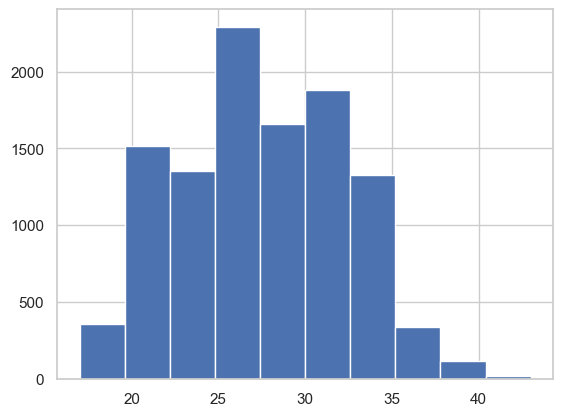

In [83]:
players.age.hist()

How does player performance overall rating change with age?

In [113]:
# Group players by age and calculate the mean overall rating
grouped_data = (players.groupby('age')['overall_rating'].mean() * players.groupby('age')['overall_rating'].count())

# Calculate the total count of players
total_players = grouped_data.sum()

 # Calculate the percentage for each age group
percentage_by_age = (grouped_data / total_players) * 100

# Round the percentages to two decimal places
percentage_by_age = percentage_by_age.round(2)

# Create a DataFrame for better organization
percentage_df = pd.DataFrame({'Age': percentage_by_age.index, 'Percentage': percentage_by_age.values})

# Display the DataFrame
print("Percentage of Players by Age:")
percentage_df


Percentage of Players by Age:


,Age,Percentage
0,17,0.13
1,18,0.72
2,19,2.12
3,20,3.60
4,21,4.32
5,22,5.45
6,23,5.91
7,24,6.48
8,25,6.62
9,26,7.36


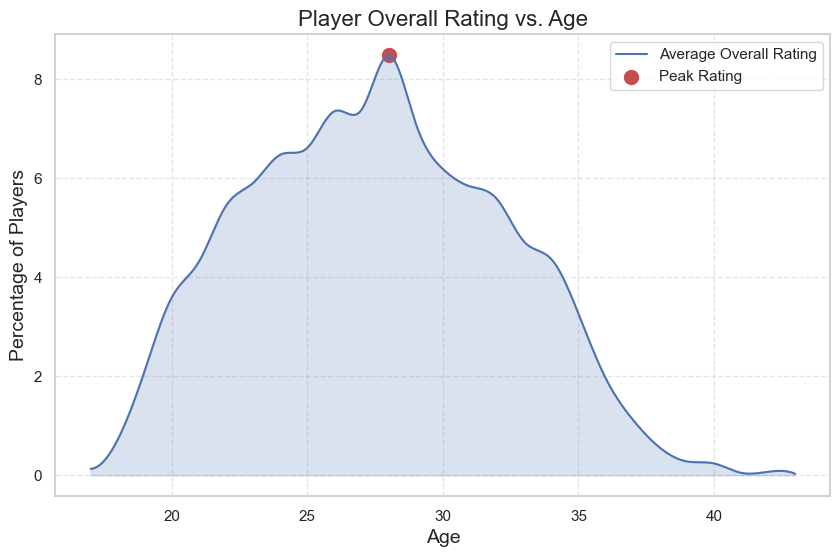

In [152]:
# Assuming 'players' is the original DataFrame
fig, ax = plt.subplots(figsize=(10, 6))

# Smooth line using spline interpolation
x_smooth = np.linspace(percentage_df['Age'].min(), percentage_df['Age'].max(), 300)
y_smooth = make_interp_spline(percentage_df['Age'], percentage_df['Percentage'])(x_smooth)
ax.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Average Overall Rating')

# Find the age corresponding to the peak rating
peak_age = percentage_df['Percentage'].idxmax()

# Highlight the peak age with a red dot
# Highlight the peak age with a red dot
ax.scatter([percentage_df.loc[peak_age, 'Age']], [percentage_df.loc[peak_age, 'Percentage']], color='r', label='Peak Rating', marker='o', s=100)


# Title and axis labels
plt.title('Player Overall Rating vs. Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage of Players', fontsize=14)

# Customize gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Fill area under the curve for better visualization
ax.fill_between(x_smooth, y_smooth, alpha=0.2, color='b')

# Legend
plt.legend()

# Show the plot
plt.show()

What is the distribution of overall ratings among the players?

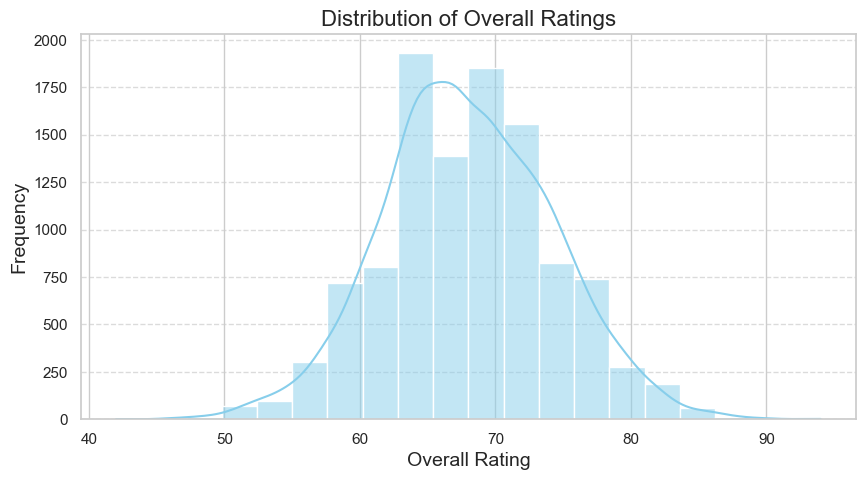

In [133]:
# Set the style to white grid
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a histogram using Seaborn
sns.histplot(players['overall_rating'], bins=20, kde=True, color='skyblue')

# Set title and axis labels
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines on the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



Are there any specific attributes strongly correlated with overall ratings?


In [88]:
# Create a DataFrame with columns where all values are either integers or floats
players_att = players.loc[:, players.applymap(lambda x: isinstance(x, (int, float))).all()]

players_att



C:\Users\ronel\AppData\Local\Temp\ipykernel_19280\1322011301.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  players_att = players.loc[:, players.applymap(lambda x: isinstance(x, (int, float))).all()]


,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
0,182.88,187,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,23
5,170.18,146,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,26
38,170.18,163,65.0,67.0,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0,24
64,182.88,198,69.0,69.0,57.0,21.0,68.0,65.0,48.0,56.0,38.0,40.0,61.0,62.0,33.0,34.0,62.0,57.0,41.0,59.0,71.0,49.0,90.0,29.0,70.0,62.0,26.0,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0,33
87,182.88,154,70.0,70.0,46.0,34.0,73.0,65.0,33.0,47.0,42.0,25.0,58.0,58.0,33.0,31.0,41.0,68.0,52.0,48.0,67.0,60.0,75.0,26.0,66.0,68.0,29.0,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183924,182.88,168,73.0,73.0,42.0,27.0,74.0,70.0,30.0,54.0,49.0,33.0,53.0,63.0,53.0,63.0,62.0,68.0,62.0,57.0,84.0,54.0,76.0,30.0,75.0,66.0,22.0,52.0,50.0,76.0,77.0,72.0,14.0,10.0,11.0,8.0,12.0,35
183937,182.88,176,63.0,67.0,65.0,44.0,59.0,63.0,49.0,57.0,67.0,64.0,63.0,61.0,69.0,68.0,62.0,65.0,58.0,30.0,68.0,77.0,69.0,31.0,67.0,61.0,49.0,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0,27
183953,180.34,154,68.0,73.0,64.0,38.0,71.0,66.0,57.0,65.0,60.0,44.0,60.0,67.0,71.0,73.0,59.0,69.0,72.0,59.0,42.0,70.0,68.0,53.0,78.0,64.0,58.0,66.0,61.0,67.0,71.0,59.0,15.0,13.0,5.0,6.0,6.0,31
183960,185.42,172,67.0,78.0,48.0,43.0,79.0,59.0,59.0,36.0,29.0,37.0,51.0,61.0,66.0,66.0,56.0,62.0,53.0,50.0,68.0,68.0,67.0,46.0,71.0,67.0,28.0,63.0,45.0,65.0,66.0,65.0,14.0,7.0,15.0,10.0,12.0,29


In [135]:
correlation_matrix = players_att.corr()
correlation_with_overall = correlation_matrix['overall_rating']
sorted_correlation = correlation_with_overall.abs().sort_values(ascending=False)
sorted_correlation

overall_rating        1.000000
potential             0.811690
reactions             0.780192
short_passing         0.421407
vision                0.411337
long_passing          0.398856
ball_control          0.387937
shot_power            0.354159
long_shots            0.330681
curve                 0.330067
volleys               0.307849
dribbling             0.301969
crossing              0.300782
positioning           0.288873
free_kick_accuracy    0.285005
penalties             0.282868
aggression            0.277280
finishing             0.266610
stamina               0.250152
heading_accuracy      0.246833
jumping               0.232906
strength              0.230103
agility               0.215996
age                   0.208166
interceptions         0.204054
sprint_speed          0.193576
acceleration          0.179849
standing_tackle       0.157741
sliding_tackle        0.136259
marking               0.127042
balance               0.101482
weight                0.065669
gk_divin

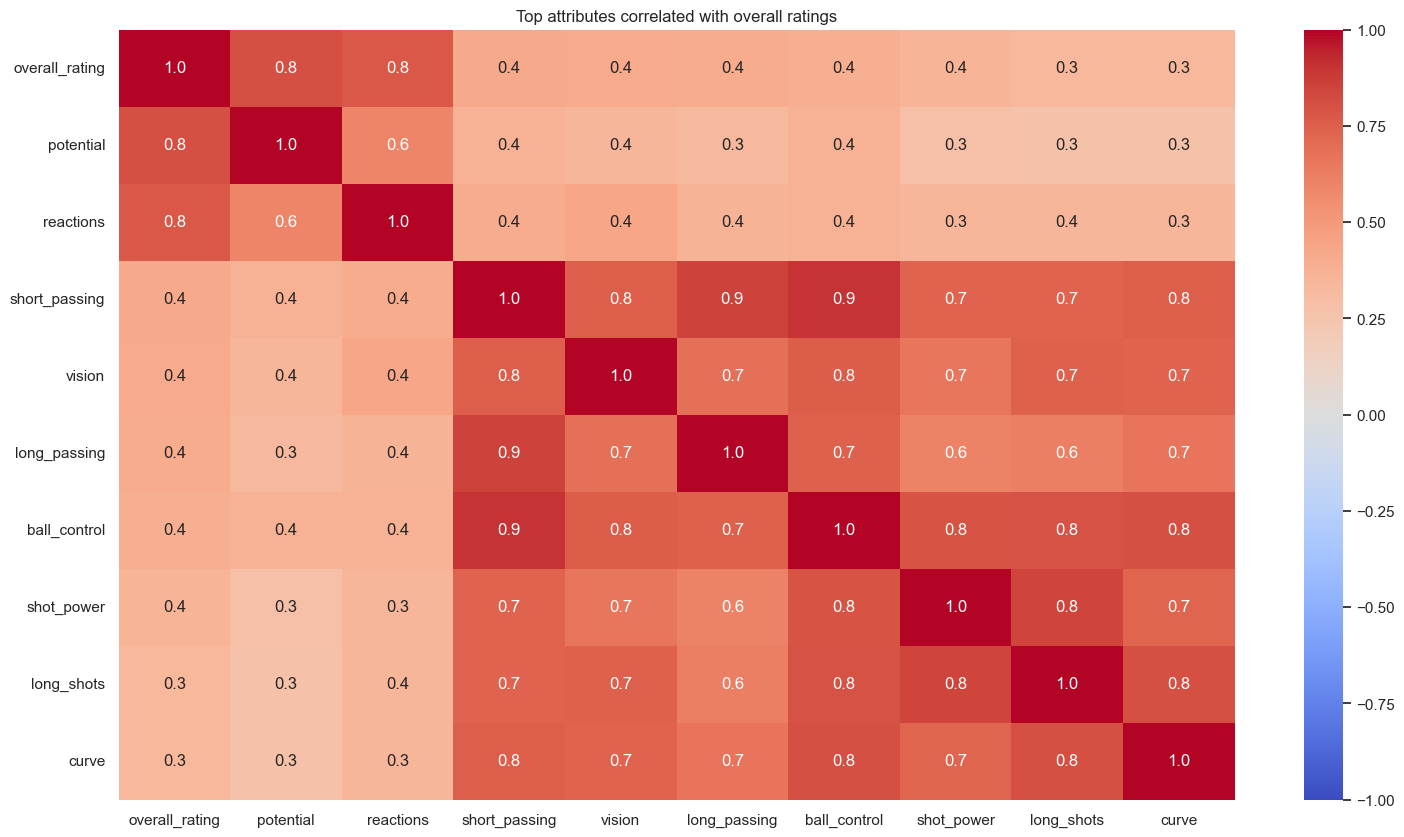

In [136]:
# top 10 most correlated attributes
top_n_attributes = sorted_correlation.index[:10]  

# Filter the correlation matrix to include only the top N attributes
filtered_correlation_matrix = correlation_matrix.loc[top_n_attributes, top_n_attributes]

# Plot the filtered heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(filtered_correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f", vmin=-1, vmax=1)
plt.title('Top attributes correlated with overall ratings')
plt.show()


In [137]:
# Extract the 'overall_rating' column
ovr = players['overall_rating']

# Calculate the correlation between 'overall_rating' and other numerical columns
corr_ovr = players.drop(['name', 'birthday', 'date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], axis=1).corrwith(ovr)

# Sort the correlations in descending order
corr_ovr = corr_ovr.sort_values(ascending=False)


C:\Users\ronel\AppData\Local\Temp\ipykernel_19280\2864128336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=corr_ovr.index, y=corr_ovr.values, palette='viridis', alpha=0.8)


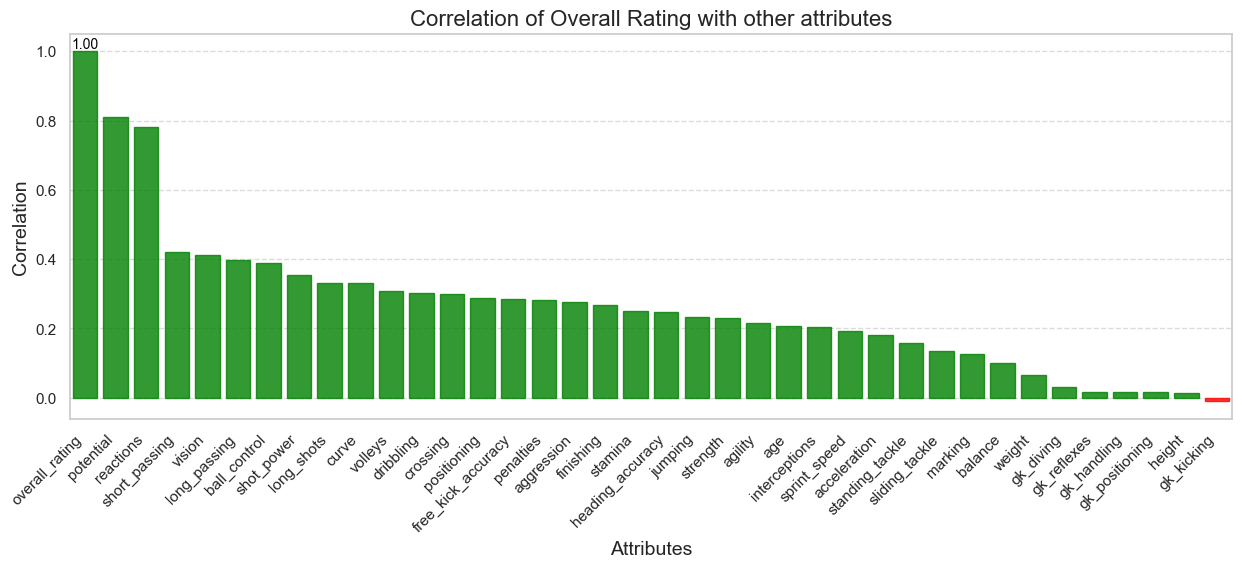

In [93]:
# Create a bar plot to visualize the correlation of 'overall_rating' with other attributes
plt.figure(figsize=(15, 5))

# Use Seaborn's barplot to create the plot
barplot = sns.barplot(x=corr_ovr.index, y=corr_ovr.values, palette='viridis', alpha=0.8)

# Add horizontal grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels to the bars with a format of two decimal places
barplot.bar_label(barplot.containers[0], fmt='%.2f', label_type='edge', fontsize=10, color='black')

# Color the bars in red if the correlation is negative, and in green if it's positive
bar_colors = ['red' if corr < 0 else 'green' for corr in corr_ovr.values]
for bar, color in zip(barplot.patches, bar_colors):
    bar.set_color(color)

# Set x-axis label, y-axis label, and title of the plot
plt.xlabel("Attributes", fontsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.title('Correlation of Overall Rating with other attributes', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the final bar plot
plt.show()



How are height and weight distributed among the players?

In [138]:
# Calculate descriptive statistics for the 'height' column
height_stats = players['height'].describe()

# Calculate descriptive statistics for the 'weight' column
weight_stats = players['weight'].describe()

# Print the statistics
print("Height Statistics:")
print(height_stats)

print("\nWeight Statistics:")
weight_stats



Height Statistics:
count    10848.000000
mean       181.874115
std          6.361649
min        157.480000
25%        177.800000
50%        182.880000
75%        185.420000
max        208.280000
Name: height, dtype: float64

Weight Statistics:


count    10848.000000
mean       168.377028
std         14.991617
min        117.000000
25%        159.000000
50%        168.000000
75%        179.000000
max        243.000000
Name: weight, dtype: float64

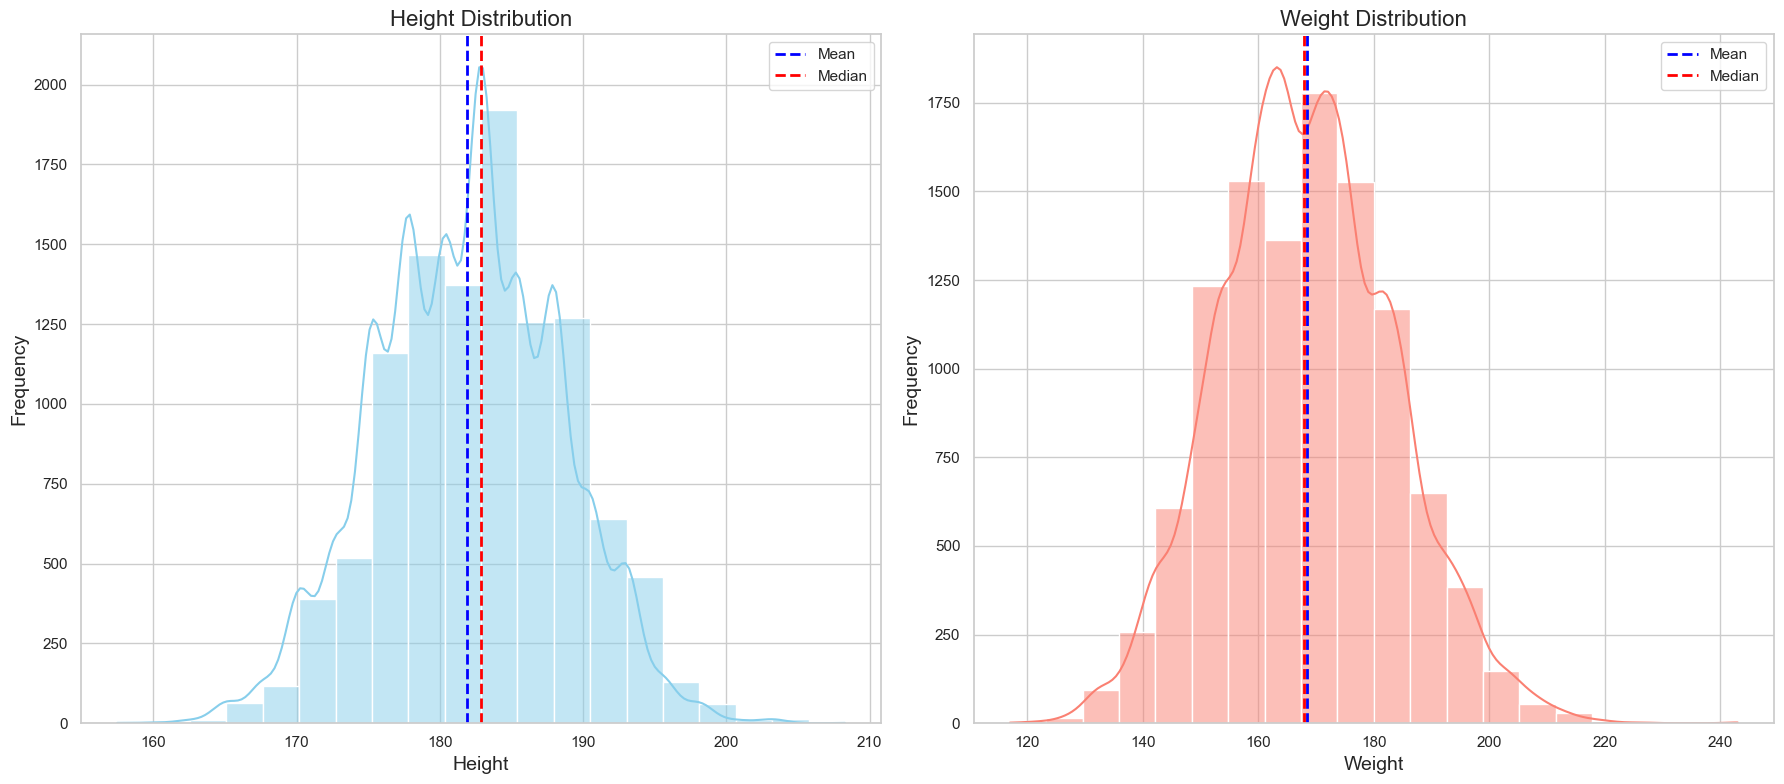

In [139]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Plot the histogram for 'height'
plt.subplot(1, 2, 1)
sns.histplot(players['height'], kde=True, color='skyblue', bins=20)
plt.axvline(players['height'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(players['height'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title('Height Distribution', fontsize=16)
plt.xlabel('Height', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plot the histogram for 'weight'
plt.subplot(1, 2, 2)
sns.histplot(players['weight'], kde=True, color='salmon', bins=20)
plt.axvline(players['weight'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(players['weight'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title('Weight Distribution', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()




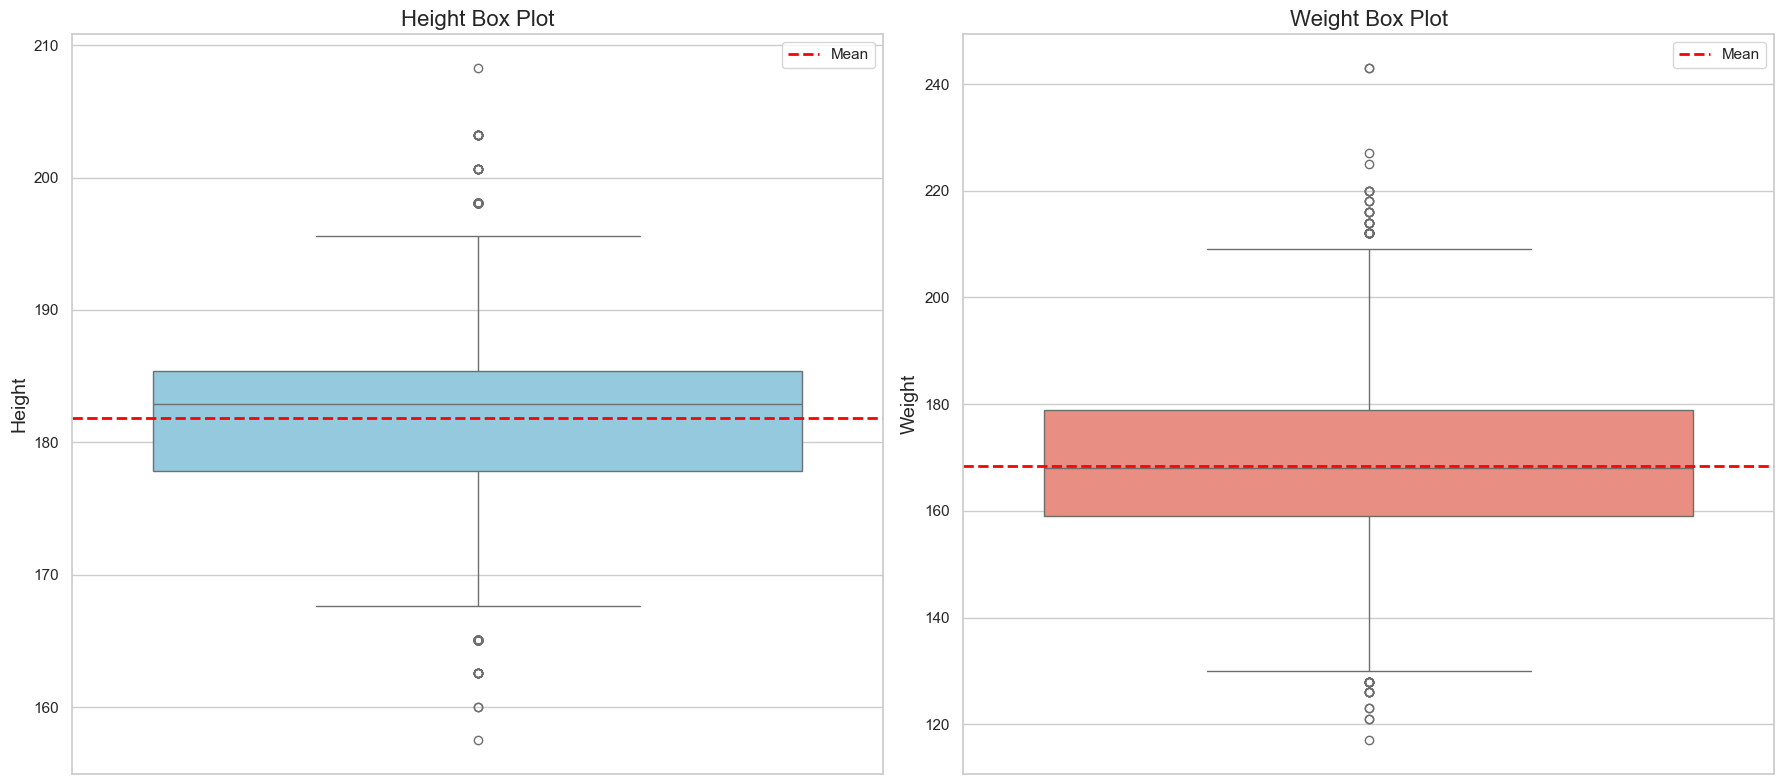

In [144]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Plot the box plot for 'height'
plt.subplot(1, 2, 1)
sns.boxplot(y=players['height'], color='skyblue')
plt.axhline(players['height'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Height Box Plot', fontsize=16)
plt.ylabel('Height', fontsize=14)
plt.legend()

# Plot the box plot for 'weight'
plt.subplot(1, 2, 2)
sns.boxplot(y=players['weight'], color='salmon')
plt.axhline(players['weight'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Weight Box Plot', fontsize=16)
plt.ylabel('Weight', fontsize=14)
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


Is there a correlation between physical attributes (height, weight) and certain performance metrics?


In [145]:
# Define lists of columns for physical attributes and performance metrics
physical_attributes = ['height', 'weight']
performance_metrics = ['overall_rating', 'acceleration', 'sprint_speed', 'strength', 'agility']

# Combine the lists to create a list of selected columns
selected_columns = physical_attributes + performance_metrics

# Create a new DataFrame ('selected_df') containing only the selected columns
selected_df = players[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Display the correlation matrix
correlation_matrix


,height,weight,overall_rating,acceleration,sprint_speed,strength,agility
height,1.000000,0.765419,0.013049,-0.532894,-0.444499,0.580233,-0.642856
weight,0.765419,1.000000,0.065669,-0.503332,-0.429812,0.635521,-0.598748
overall_rating,0.013049,0.065669,1.000000,0.179849,0.193576,0.230103,0.215996
acceleration,-0.532894,-0.503332,0.179849,1.000000,0.910396,-0.293716,0.797689
sprint_speed,-0.444499,-0.429812,0.193576,0.910396,1.000000,-0.194647,0.729972
strength,0.580233,0.635521,0.230103,-0.293716,-0.194647,1.000000,-0.409687
agility,-0.642856,-0.598748,0.215996,0.797689,0.729972,-0.409687,1.000000


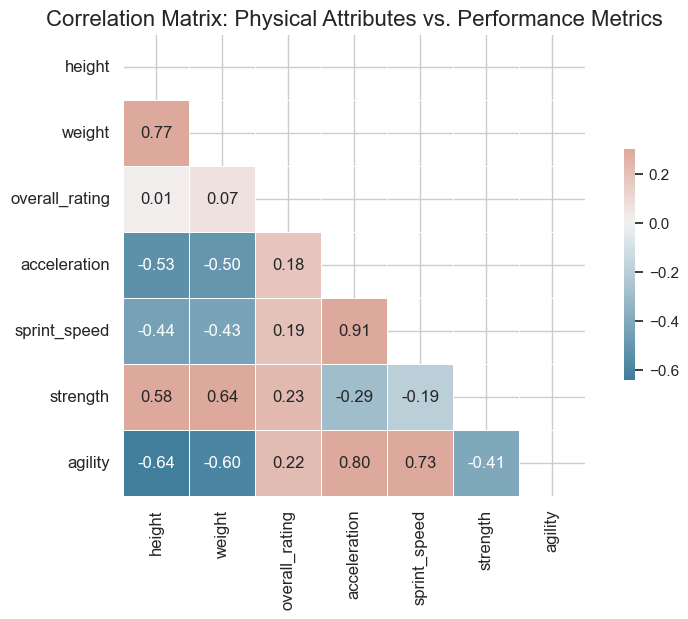

In [146]:
# Create an upper triangular mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a diverging color palette
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Set title and axis labels
plt.title('Correlation Matrix: Physical Attributes vs. Performance Metrics', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


Potential Analysis:


How does the distribution of potential ratings look?

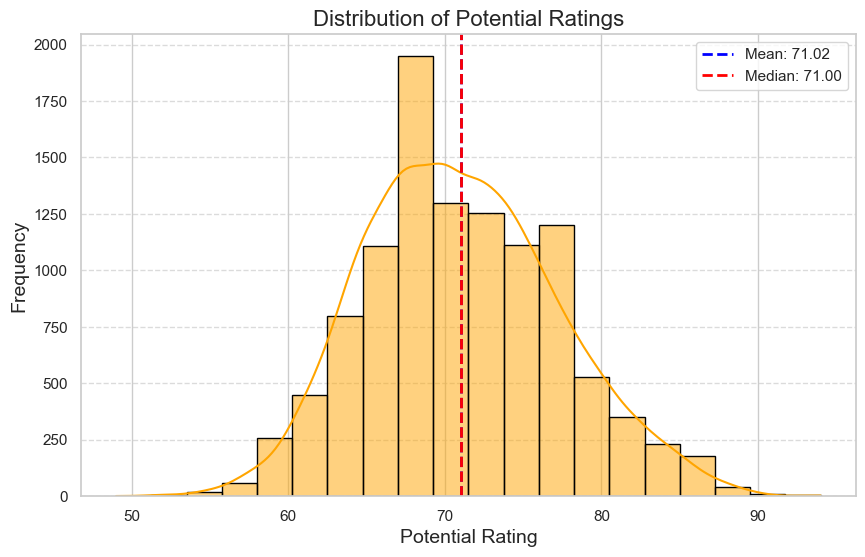

In [147]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram with kernel density estimation (KDE)
sns.histplot(players['potential'], bins=20, kde=True, color='orange', edgecolor='black')

# Calculate mean and median values
mean_value = players['potential'].mean()
median_value = players['potential'].median()

# Add vertical lines for mean and median
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Set labels and title
plt.xlabel('Potential Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Potential Ratings', fontsize=16)

# Display legend
plt.legend()

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()




Are there attributes that correlate strongly with a player's potential?



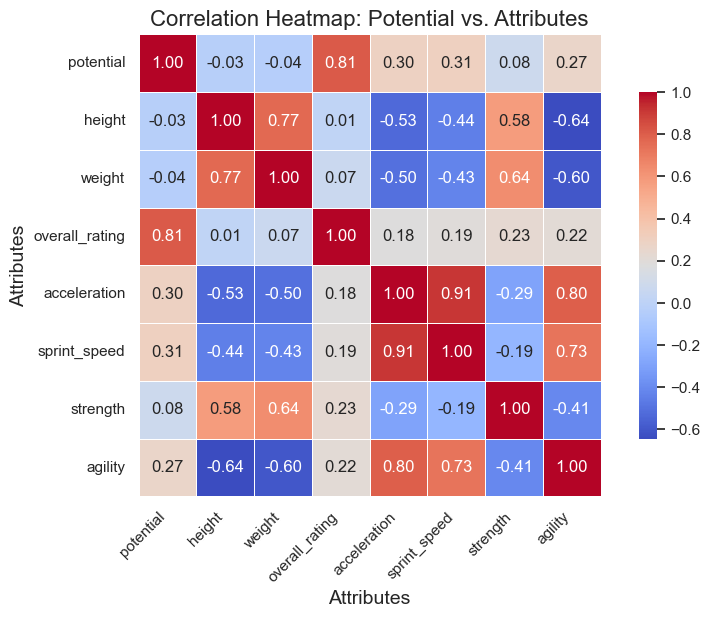

In [148]:
# Define the attributes for correlation
attributes_for_correlation = ['height', 'weight', 'overall_rating', 'acceleration', 'sprint_speed', 'strength', 'agility']

# Select columns for analysis
selected_columns = ['potential'] + attributes_for_correlation
selected_df = players[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap with annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})

# Set title and labels
plt.title('Correlation Heatmap: Potential vs. Attributes', fontsize=16)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('Attributes', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Levels:



What are the average scores for key skills like crossing, finishing, dribbling, etc.?

C:\Users\ronel\AppData\Local\Temp\ipykernel_19280\1805444704.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis', alpha=0.8)


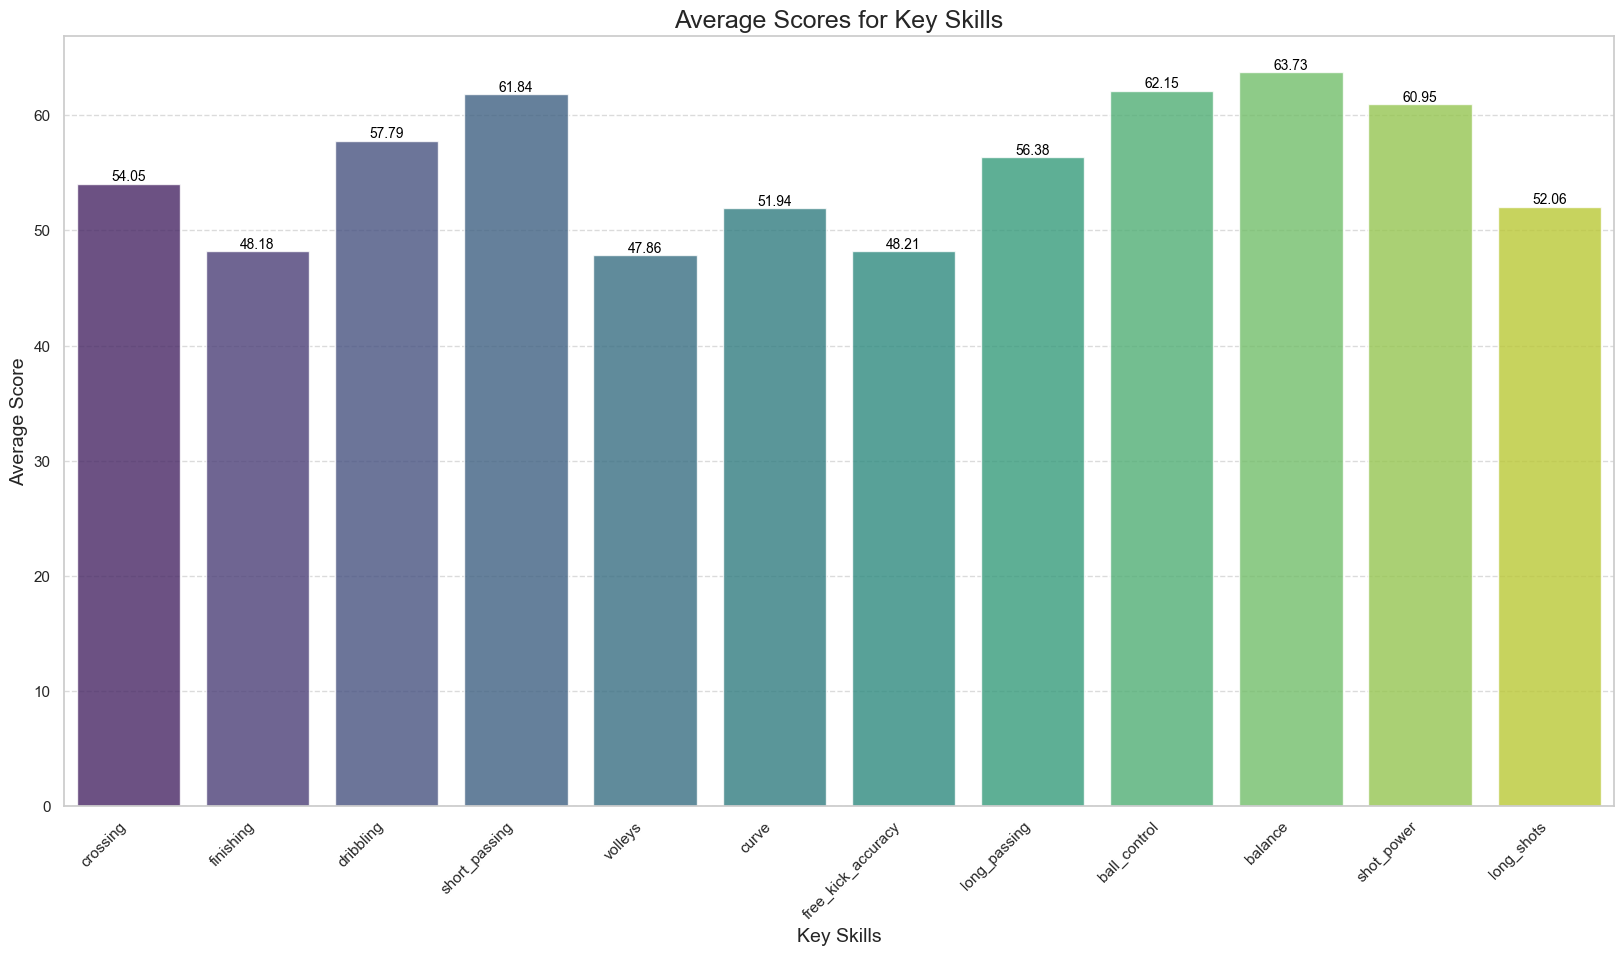

In [149]:
# Define the key skills
key_skills = ['crossing', 'finishing', 'dribbling', 'short_passing', 'volleys', 'curve', 'free_kick_accuracy',
              'long_passing', 'ball_control', 'balance', 'shot_power', 'long_shots']

# Calculate the average scores for each key skill
average_scores = players[key_skills].mean()

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot
barplot = sns.barplot(x=average_scores.index, y=average_scores.values, palette='viridis', alpha=0.8)

# Add individual data points as dots on top of the bars
for index, value in enumerate(average_scores):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Key Skills', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.title('Average Scores for Key Skills', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Can you identify players with exceptional skills in specific areas?

In [150]:
# Define specific areas and threshold
specific_areas = ['finishing', 'dribbling', 'free_kick_accuracy', 'shot_power']
threshold = 80

# Filter players with exceptional skills
exceptional_players = players[(players[specific_areas] >= threshold).all(axis=1)]

# Display information about exceptional players
print("Players with Exceptional Skills:")
print(exceptional_players[['name'] + specific_areas])



Players with Exceptional Skills:
                      name  finishing  dribbling  free_kick_accuracy  \
16460         Arjen Robben       85.0       93.0                83.0   
26298         Carlos Tevez       88.0       86.0                82.0   
40699          David Villa       86.0       82.0                80.0   
53792     Fabrizio Miccoli       80.0       83.0                86.0   
61107          Gareth Bale       81.0       87.0                85.0   
64607   Giovani dos Santos       81.0       85.0                80.0   
71227                 Hulk       85.0       84.0                84.0   
74280         Ivan Rakitic       82.0       83.0                84.0   
76430      James Rodriguez       85.0       87.0                86.0   
102482        Lionel Messi       93.0       96.0                90.0   
105983         Luis Suarez       90.0       88.0                84.0   
108508   Manolo Gabbiadini       80.0       80.0                82.0   
111954          Marco Reus     

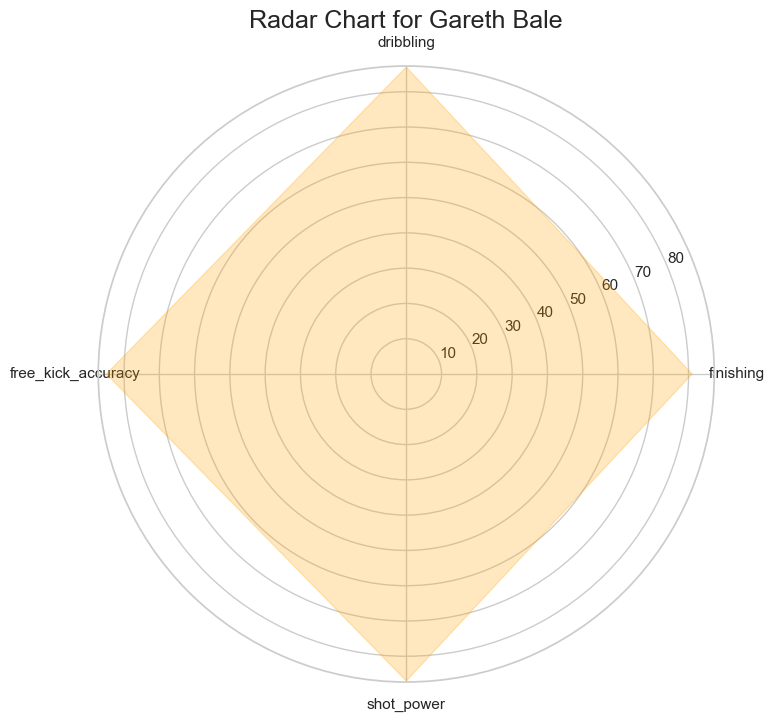

In [151]:
# Specify the player's name
player_name = 'Gareth Bale'

# Specify specific skill areas and threshold
specific_areas = ['finishing', 'dribbling', 'free_kick_accuracy', 'shot_power']
threshold = 80  

# Filter players with exceptional skills
exceptional_players = players[(players[specific_areas] >= threshold).all(axis=1)]

# Select the specific player by name
selected_player = exceptional_players[exceptional_players['name'] == player_name]

# Extract skill ratings for the selected player
player_ratings = selected_player[specific_areas].values.flatten().tolist()

# Calculate angles for the radar chart
num_areas = len(specific_areas)
angles = np.linspace(0, 2 * np.pi, num_areas, endpoint=False).tolist()

# Make the plot circular by repeating the first data point
player_ratings += player_ratings[:1]
angles += angles[:1]

# Create the radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, player_ratings, color='orange', alpha=0.25)

# Add labels for each area
ax.set_thetagrids(np.degrees(angles[:-1]), labels=specific_areas)

# Add a title
plt.title(f'Radar Chart for {player_name}', size=18)

# Show the plot
plt.show()